# Types

Every object in Julia has a type that can be accessed with `typeof`.

### Integers

In [1]:
1

1

In [3]:
typeof(1)

Int64

The default system integer type is aliased to `Int`. On my 64-bit machine, it is an `Int64`

In [ ]:
Int

### Floating point numbers

By default, real numbers are represented by 64-bit "double precision" IEEE standard floating point numbers (the same as `double` in C). Literals are written with a decimal point:

In [ ]:
2.0 + 4.0

In [ ]:
typeof(2.0)

You can also use "single precision" 32-bit floating point numbers. with an `f0` at the end.

In [ ]:
typeof(2.0f0)

### Rationals

In [ ]:
332//241

In [ ]:
332//241 - 235//128

### Strings

In [ ]:
"Life is a POMDP"

# Type Conversion

In [ ]:
convert(Float64, 1)

# Variables

Variables are names assigned to objects.

In [ ]:
a = 1

In [149]:
b = a
a = 5
b

1

In [150]:
a + b

6

A variable does not have a type - only the object that it refers to has a type.

In [151]:
c = 1
typeof(c)

Int64

In [152]:
c = 3.2
typeof(c)

Float64

# Arrays

In [153]:
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [155]:
push!(v, 4)

5-element Vector{Int64}:
 1
 2
 3
 4
 4

The type in the curly brackets indicates what kind of objects the vector can contain. 

In [156]:
push!(v, "string")

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Ptr[39m) where T<:Integer at pointer.jl:23
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:113
[0m  ...

`Vector{Any}` objects can contain any type of object, but they are less efficient.

In [157]:
Any[1, 2.0, "three"]

3-element Vector{Any}:
 1
 2.0
  "three"

`Array`s can even contain other `Array`s.

In [158]:
[[1, 2], [3,4]]

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 4]

### Indexing

In [159]:
v[1]

1

In [160]:
v[1] = 5
v

5-element Vector{Int64}:
 5
 2
 3
 4
 4

### Vectors and Matrices

A `Vector` is a one-dimensional `Array`. They are written with comma-separated values.

This is in contrast to Matlab, where vectors are usually represented as $n \times 1$ 2-dimensional arrays. In Matlab, the distinction between row vectors and column vectors is a primary concern, it is not usually a concern in Julia.

In [161]:
typeof([1.0, 2.0])

Vector{Float64} (alias for Array{Float64, 1})

In [162]:
size([1.0, 2.0])

(2,)

A `Matrix` is a two-dimensional `Array`. They are written with spaces and semicolons.

In [163]:
m = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [164]:
typeof(m)

Matrix{Int64} (alias for Array{Int64, 2})

In [165]:
size(m)

(2, 2)

# Mutable and Immutable Types

Some types, such as `Int` and `Float64` are immutable - that means the objects themselves can never be modified. Other types, such as `Vector` are mutable and the objects can be modified.

In [166]:
a = 1
b = a
a += 1 # identical to a = a + 1
a, b

(2, 1)

In [167]:
v = [1,2]
u = v
u[1] = 5
u, v

([5, 2], [5, 2])

Convention: functions with `!` (pronounced "bang") modify their arguments

In [168]:
a = [1,2]
push!(a, 3)
a

3-element Vector{Int64}:
 1
 2
 3

Two important immutable types are `Tuple`s and `StaticArray`s.

`Tuple`s are immutable collections of a few objects that can each have a different type without performanc penalties. Literals representing `Tuple`s are surrounded by parentheses with items separated by commas.

In [171]:
typeof((1,"two"))

Tuple{Int64, String}

`StaticArray`s come from the `StaticArrays.jl` package. They are immutable, have fixed size, and are useful for representing small arrays (like x-y position) in performance-critical code. The easiest way to construct one is by preceding an array literal with `SA`:

In [172]:
using StaticArrays
SA[1,2,3]

3-element SVector{3, Int64} with indices SOneTo(3):
 1
 2
 3

# Debugging

## Printline Debugging

In [26]:
a = [1,2,3]
@show a # Things that begin with "@", like @show, are "macros"
a + a

a = [1, 2, 3]


3-element Vector{Int64}:
 2
 4
 6

In [3]:
a = [1,2,3]
display(a)
a + a

3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Int64}:
 2
 4
 6

In [4]:
a = [1,2,3]
@debug("debug doesn't print by default", a)
@info("some info", a)
@warn("a warning", a)
@error("an error message (with no exception)", a)

┌ Info: some info
│   a =
│    3-element Vector{Int64}:
│     1
│     2
└     3
┌ Warning: a warning
│   a =
│    3-element Vector{Int64}:
│     1
│     2
│     3
└ @ Main In[4]:4
┌ Error: an error message (with no exception)
│   a =
│    3-element Vector{Int64}:
│     1
│     2
│     3
└ @ Main In[4]:5


In [5]:
using Logging
debuglogger = ConsoleLogger(stderr, Logging.Debug)
with_logger(debuglogger) do
    @debug("this debug message will print")
end

┌ Debug: this debug message will print
└ @ Main In[5]:4


## Debugger

In [6]:
using Debugger

@enter sin(2)

LoadError: Debugger.jl needs to be run in a Julia REPL

# Functions

In [27]:
function f(x)
    return x^2
end

f (generic function with 3 methods)

In [28]:
f(x) = x^2

f (generic function with 3 methods)

In [29]:
f(2.0)

A float!


4.0

In [11]:
g = x -> x^2

#7 (generic function with 1 method)

In [12]:
g(2.0)

4.0

### Methods and multiple dispatch

In [30]:
function f(x::Float64)
    println("A float!")
    return x^2
end

f (generic function with 3 methods)

In [31]:
function f(x::Int)
    println("An int!")
    return x^2
end

f (generic function with 3 methods)

In [32]:
f(1)

An int!


1

In [33]:
f(2.0)

A float!


4.0

In [34]:
f("three")

"threethree"

In [18]:
methods(f)

# 3 methods for generic function "f":
[1] f(x::Float64) in Main at In[13]:1
[2] f(x::Int64) in Main at In[14]:1
[3] f(x) in Main at In[8]:1

# Plotting

In [35]:
using Plots # the first time this will be slow because it's compiling

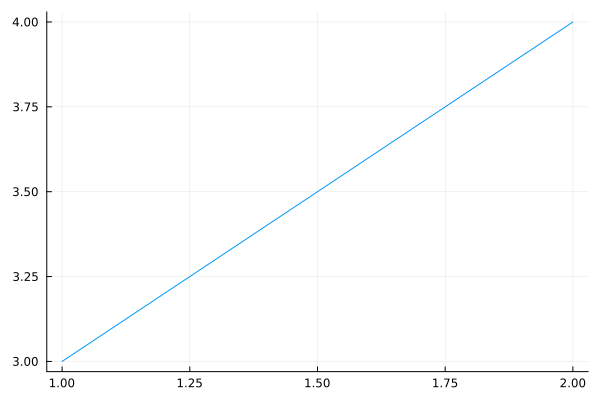

In [36]:
plot([1,2], [3,4], label=nothing) # also slow the first time

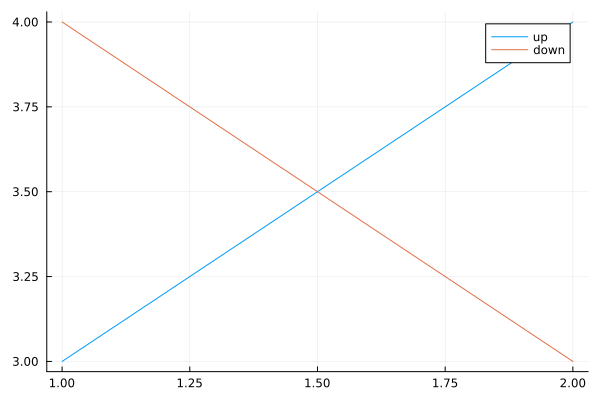

In [37]:
plot([1,2], [3,4], label="up")
plot!([1,2], [4,3], label="down") # plot! adds another plot

# Type stability

You want to make it easy for the compiler to predict what your function will return.

In [38]:
function good()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0.0
    end
end

good (generic function with 1 method)

In [42]:
function bad()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0
    end
end

bad (generic function with 1 method)

In [43]:
@code_warntype bad()

MethodInstance for bad()
  from bad() in Main at In[42]:1
Arguments
  #self#::Core.Const(bad)
Body::Float64
1 ─ %1  = Main.Float64::Core.Const(Float64)
│   %2  = Main.rand()::Float64
│   %3  = (%2 > 0.5)::Bool
└──       goto #3 if not %3
2 ─ %5  = Main.sqrt(2.0)::Core.Const(1.4142135623730951)
│   %6  = Base.convert(%1, %5)::Core.Const(1.4142135623730951)
│   %7  = Core.typeassert(%6, %1)::Core.Const(1.4142135623730951)
└──       return %7
3 ─ %9  = Base.convert(%1, 0)::Core.Const(0.0)
│   %10 = Core.typeassert(%9, %1)::Core.Const(0.0)
└──       return %10



In [41]:
@code_warntype good()

MethodInstance for good()
  from good() in Main at In[38]:1
Arguments
  #self#::Core.Const(good)
Body::Float64
1 ─ %1 = Main.rand()::Float64
│   %2 = (%1 > 0.5)::Bool
└──      goto #3 if not %2
2 ─ %4 = Main.sqrt(2.0)::Core.Const(1.4142135623730951)
└──      return %4
3 ─      return 0.0

